## Linear regression using boston housing data

#### Suppose you r a real estate agent and u want to predict the house price.
#### Supervised learning algorithm needs some data to train its model before making a prediction.

* Where can linear regression b used ?

* It is a very powerful technique used to understand the factors that understand the profitability.It can be used to forecast    the sales in the coming months to analysing the sales data for previous months, it can also be used to gain various insight about customer behaviour.

In [1]:
# Resource
# KGP talkie
# https://www.youtube.com/watch?v=ZeM2tHtjGy4&list=PLc2rvfiptPSTvPFbNlT_TGRupzKKhJSIv&index=5

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
# from "sklearn.metrics"import some metrics(sklearn.mean_absolute_error,mean_square_error,root_mean_square_error) to evaluate
# model performance.

#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

In [4]:
boston = load_boston()

In [5]:
type(boston)

sklearn.utils.Bunch

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [10]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [11]:
data = boston.data

In [12]:
type(data)

numpy.ndarray

In [13]:
data.shape

(506, 13)

In [14]:
data = pd.DataFrame(data=data,columns=boston.feature_names)
data.head()

#Notice that the target variable 'Price' is not included in this column 
#As Price column lies in boston.target 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
# So we include price column in above data frme

In [16]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [20]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### Data Visualization

* We'll start by creating a sccaterplot matrix that'll allow us to visualize the pairwise relationships and correlation between   the different features.
* It is also quite useful to have a quick overview of how the data is distributed and whether it contains any outliers or not

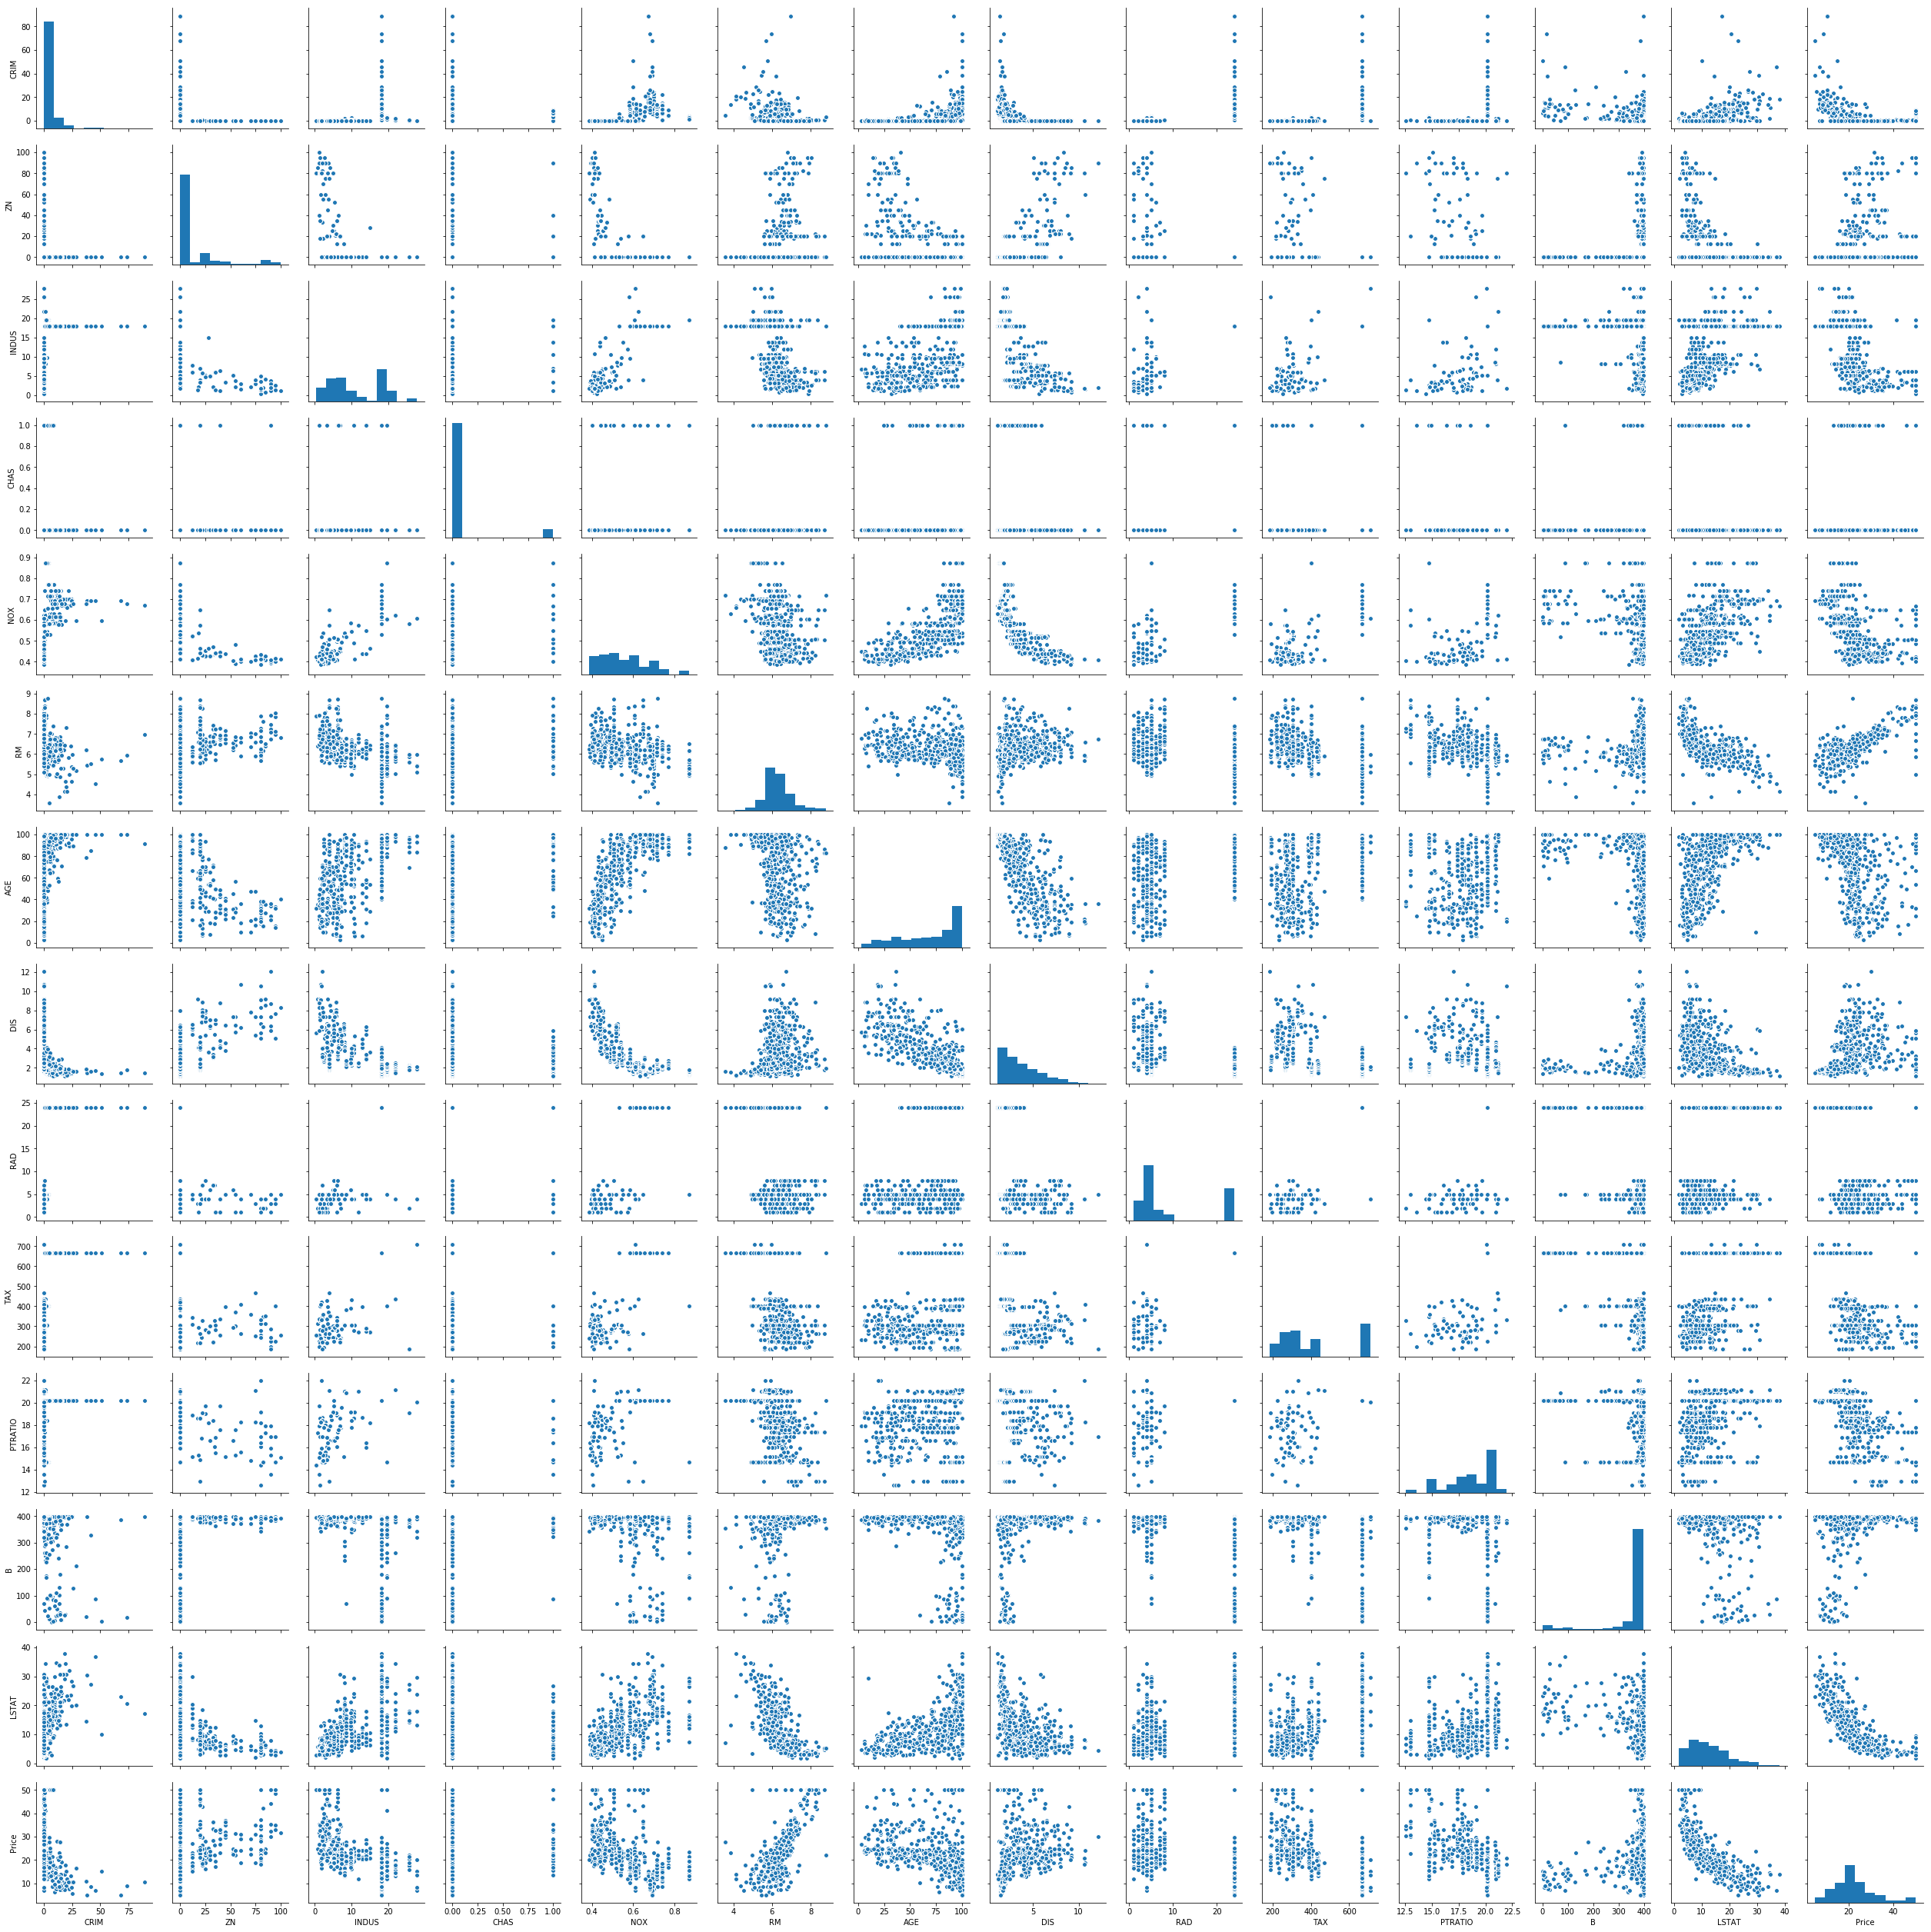

In [21]:
sns.pairplot(data)

In [22]:
# If u wanna explore the relation in a correlation manner go(plot) for correlation matrix.
# From this plot we could able to find the correlation of each features(columns) with our target variable
# Higher correlation shows that there is high chance of predictibility based on the feature to the price 

In [23]:
# Before correlation plot we'll plot "distribution plot" for each of the features in df
# Why distribution plot before corr plot ? (" It is a one way of feature selection ")

# It is b'cause if our features r not well distributed then it might not help us to predict the target variable 
# If u look at the scatterplot above we see some the features are concentrated(left skewed,right skewd)at some point,which means
# those features will not help us to predict the target variable.
# And this features will increase the complexity of the model which'll decrease the accuracy and R2(R-square) accuracy metrix in
# a testring data set.

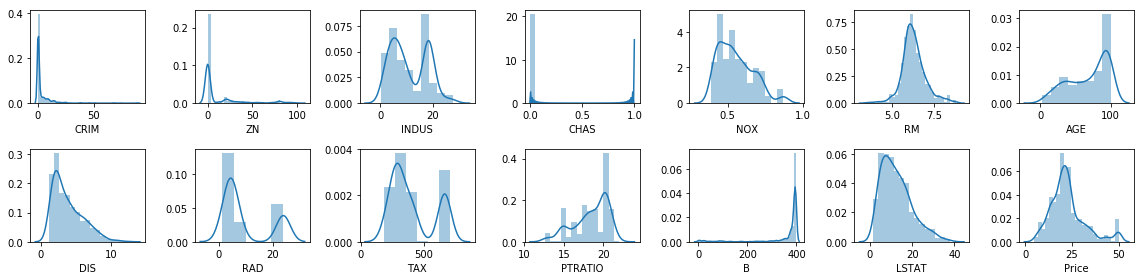

In [24]:
fix,axis = plt.subplots(nrows = 2,ncols = 7,figsize = (16,4))

col = data.columns
index = 0

for i in range(2):
    for j in range(7):
        sns.distplot(data[col[index]],ax = axis[i][j])
        index = index + 1
plt.tight_layout()

In [25]:
# Now we can see that features like 'CRIM','ZN','CHAS','B' are really very skewed so these r not really good to include in our
# data
#  features like 'NOX','DIS','RAD','TAX','PTRATIO' are somewhat partially distributed well

# 'RM','LSTAT' are distributed normally so its quite good to include them for prediction
# If features are normally distributed then there is a high chance of correlation with the target variable 

In [26]:
# How we select a feature using correlation matrix ?

corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


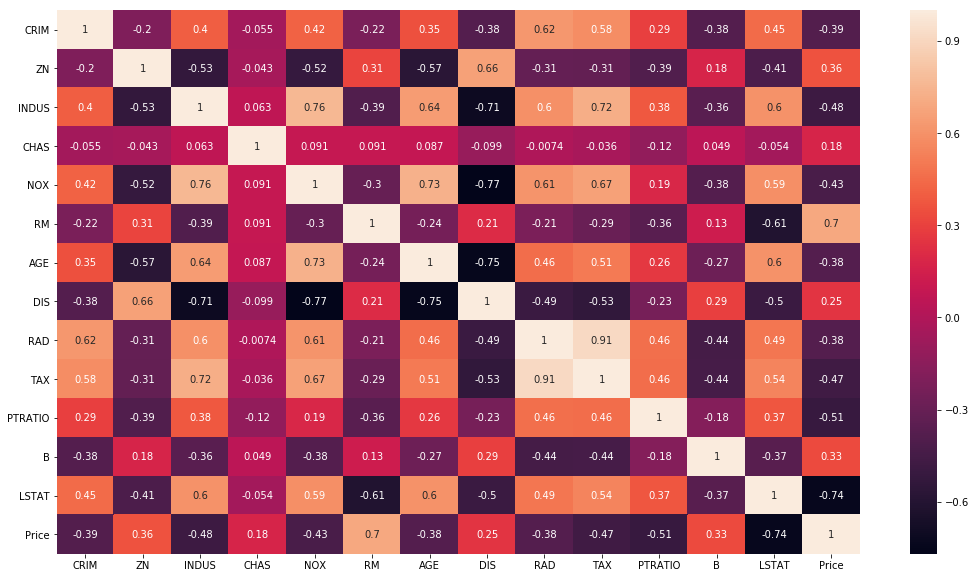

In [27]:
# Plotting correlation matrix

fig,ax =plt.subplots(figsize = (18,10))
sns.heatmap(corrmat,annot=True)

In [28]:
corrmat.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

In [29]:
# Looking at heatmap of corrmat, as "Rm" increases target varible "Price" increases
#                                as "LSTAT" increasse target varible "Price" decreses

In [30]:
# Apart from correlation we could able to find " multcollinearity " from this heatmaps
# If we look at two features(NOX,DIS) they are highly correlated(-0.77) which means there is multicollinearity
# So we gonna include only one feature which contributes(correalted) to our target variable

In [31]:
### NOTE:important

##       " Writing a function which selects features correlated with target varible "

# Here threshold will define for how much threshold we're going to get data

def getCorrelatedFeature(corrdata,threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df
            

In [32]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['Price'],threshold)
corr_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [33]:
corr_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [34]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


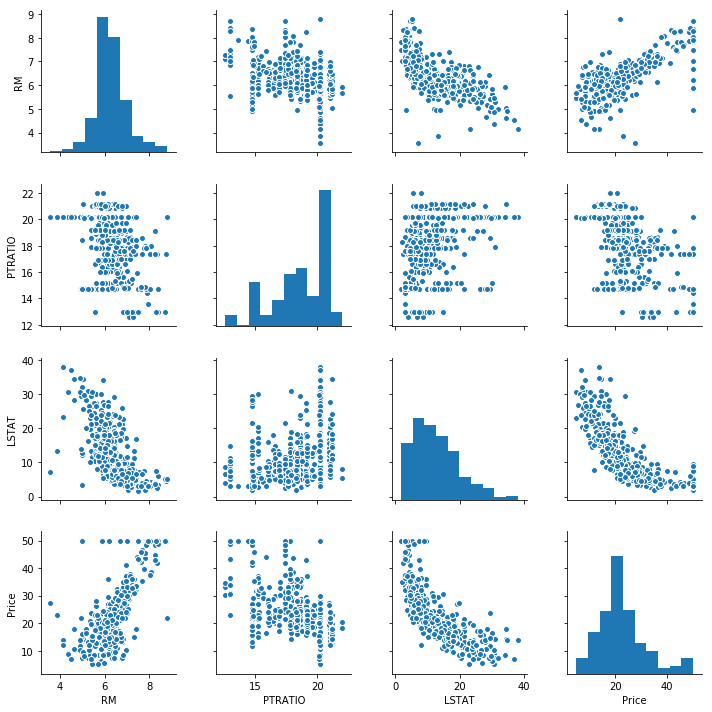

In [35]:
### Pairplot and Corrmat of correlated data

sns.pairplot(correlated_data)
plt.tight_layout()

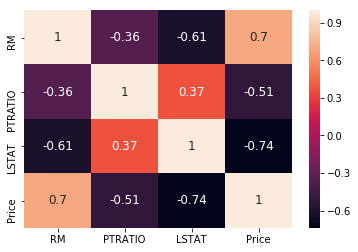

In [36]:
sns.heatmap(correlated_data.corr(),annot = True,annot_kws={'size':12})

#### Split the correlated data into training and test data sets

In [37]:
# Note: we're not removing any features which r dealing with multicollinearity

In [38]:
# Now remove the target variable which shouldn't be included in the training set

X = correlated_data.drop(labels=['Price'],axis=1)
y = correlated_data['Price'] 
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((404, 3), (102, 3))

### Triain the model

In [40]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting the model

In [41]:
y_predict = model.predict(X_test)

In [42]:
# Comparing the predicted values with actual values

df = pd.DataFrame(data = [y_predict,y_test])
df.T.head()  # T stands for transpose

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2


In [43]:
# above df using dictionaries

df = pd.DataFrame({'actual values':y_test,'predicted values': y_predict})
df.head()

,actual values,predicted values
329,22.6,27.609031
371,50.0,22.099034
219,23.0,26.529255
403,8.3,12.507986
78,21.2,22.254879


In [44]:
df.iloc[:,[1,0]]

,predicted values,actual values
329,27.609031,22.6
371,22.099034,50.0
219,26.529255,23.0
403,12.507986,8.3
78,22.254879,21.2
15,20.170639,19.9
487,19.667634,20.6
340,21.179452,18.7
310,17.053618,16.1
102,21.476452,18.6


##### Defining Performance matrics
 * In this project we r using R2(r-square) also known as " coefficient of ditermination " which ranges from 0 to 1 to quantify
   models performance.
   It is a useful statistic in 'Regression Analysis' as it often describes how 'good' that model is at making predictions 
 * A model with an R2 of 0 always fails to predict the target variable ,whereas a model with an R2 of 1 perfectly predicts 
   the target variable.
 * Any value between 0 and 1 indicates what percentage of the target variabe, using the model, can b explained by the features.
 * A model can b given a negative R2 as well, which indicates that the model is no better than one that naively predicts the
   mean of the target variable.

In [45]:
from sklearn.metrics import r2_score

In [46]:
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
rmse = np .sqrt(mean_squared_error(y_test,y_predict))

In [47]:
print('r2_score: ',score)
print('mae: ',mae)
print('mse: ',mse)
print('rmse: ',rmse)

r2_score:  0.4881642015692508
mae:  4.404434993909256
mse:  41.67799012221682
rmse:  6.455849295190898


In [48]:
correlated_data.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype='object')

### Store feature performance

In [49]:
# Lets store this performance features into pandas dataframe

#Why to store this features ?

#we'll select few other features and then makes some comparision and to make some comparision we need some history in that case
#we'll need some 'r2_score','mae','mse','rmse' to compare 2 features or 3 features or 4,5,6 etc., and find which feature
#combination is gonna produce more accuracy based on this we can finally write our model.

In [50]:
total_features = [] # here total_ feature have empty list[] in which we'll store total features which we r going to train our mdl
total_features_names = []
selected_correlation_value = [] # this is like earlier we've selected this is 50%(next we'll see 60%,70%...)so in that way we
                                # can make comparision to our model that the way we're increasing or decresing the correlation,
                                # how the total no of features are varying,how 'r2_score','mae','mse','rmse' are varying
                            
r2_scores = []
mae_value = []
mse_value = []

In [51]:
#now write a function for python method to calculate performance matrics method

#Why python method or python functions ?

#B'cause we'll b using this methods or functions many times and we're going to program it into modular way so we don't wanna 
#rewrite the code everytime

In [52]:
def performance_metrics(features,th,y_true,y_pred):     # th stands for threshold
    score = r2_score(y_true,y_pred)
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    
    total_features.append(len(features)-1) # we'll append the total_features on which we going to train the model
                                        # we pass this function "len(features)-1" since it includes "Price"which is'nt a feature
    total_features_names.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe = pd.DataFrame(data = [total_features_names,total_features,selected_correlation_value,r2_scores,mae_value,mse_value],
                                    index = ['features names','#features','corr_val','r2_score','mae','mse'])
    return metrics_dataframe.T

In [53]:
# performance_metrics() shift+tab to see documentation

performance_metrics(correlated_data.columns.values,threshold,y_test,y_predict)

,features names,#features,corr_val,r2_score,mae,mse
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678


### Regression plot of the features correlated with the House Price

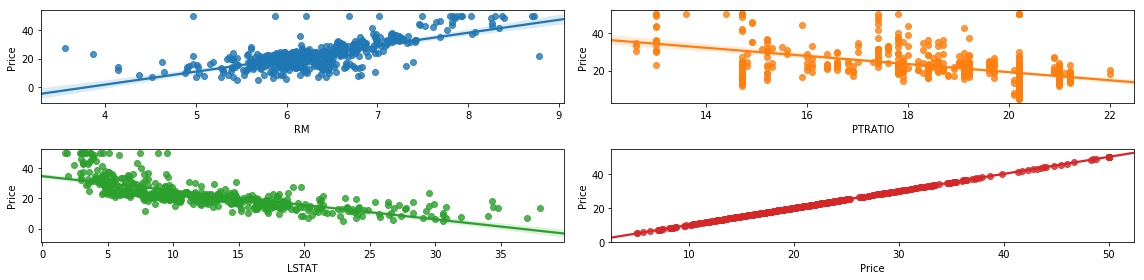

In [54]:
rows = 2
cols = 2
fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))

col = correlated_data.columns
index = 0


for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]],y = correlated_data['Price'],ax = ax[i][j])
        index = index + 1
fig.tight_layout()     

### Let's find out other combination of features(columns) to get better accuracy with >60% 

In [55]:
corrmat['Price']
# From this we found out RM,LSTAT are the only features correlated >60%  with PRICE

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [56]:
threshold  = 0.60
corr_value = getCorrelatedFeature(corrmat['Price'],threshold)
corr_value

,Corr Value
RM,0.695360
LSTAT,-0.737663
Price,1.000000


In [57]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [58]:
# we've been doing fitting of the model,predicting the model 
# now we're writing a function which do this model fitting,predicting automaticaly

# IT's a very good technique when u testing ur model with multiple times with different set of features and different set of 
# correlated values 

def get_y_predict(corr_data):
    X = corr_data.drop(labels = ['Price'],axis=1)
    y = corr_data['Price']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    return y_predict

            
# This means i'll pass correlated_data then it'll automatically do predictions since it include              
# target variable as well, inside it'll automatically train_test_split,bulid mdl,predict trgt var        

In [59]:
y_predict = get_y_predict(correlated_data)

In [60]:
performance_metrics(correlated_data.columns.values,threshold,y_test,y_predict)

,features names,#features,corr_val,r2_score,mae,mse
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831


### Let's find out other combination of features(columns) to get better accuracy with >70%

In [61]:
corrmat['Price']

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [62]:
threshold = 0.7
corr_val = getCorrelatedFeature(corrmat['Price'],threshold)
corr_val

,Corr Value
LSTAT,-0.737663
Price,1.000000


In [63]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [64]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values,threshold,y_test,y_predict)

,features names,#features,corr_val,r2_score,mae,mse
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['RM' 'LSTAT' 'Price'],2,0.7,0.540908,4.14244,37.3831


In [65]:
# The model which we trained so far is automatically do normalization
# But it is important to know about it 

### Lets go ahead and understand what is Standardization and Normalization 

In [66]:
#The concept of standardization or standardized coefficients (aka estimates) comes into picture when predictors 
#(aka independent variables)are expressed in different units. Suppose you have 3 independent variables - age, height and weight.
#The variable 'age' is expressed in years, height in cm, weight in kg. If we need to rank these predictors based on the 
#unstandardized coefficient, it would not be a fair comparison as the unit of these variable is not same.


#Standardized Coefficients (or Estimates) are mainly used to rank predictors (or independent or explanatory variables) as it 
#eliminate the units of measurement of  independent and dependent variables). We can rank independent variables with absolute
#value of standardized coefficients. The most important variable will have maximum absolute value of standardized coefficient

# Different methods for Standardization
# 1. " Z-score = x-mean/S.D. " its range lies b/w (-3,+3)
# 2. " min-max = x-max(x)/max(x)-min(x) " its range lies b/w (0,1)